Saving Dirtydataset.CSV to Dirtydataset (2).CSV
First 5 rows:
    CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0           1    Male  19.0                15.0            39.0
1           2    Male  21.0                 NaN            81.0
2           3  Female  20.0                16.0             6.0
3           4  Female   NaN                16.0            77.0
4           5  Female  31.0                17.0            40.0

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          23 non-null     int64  
 1   Genre               23 non-null     object 
 2   Age                 21 non-null     float64
 3   Annual_Income_(k$)  21 non-null     float64
 4   Spending_Score      21 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.0+ KB

Summary statistics:
        C

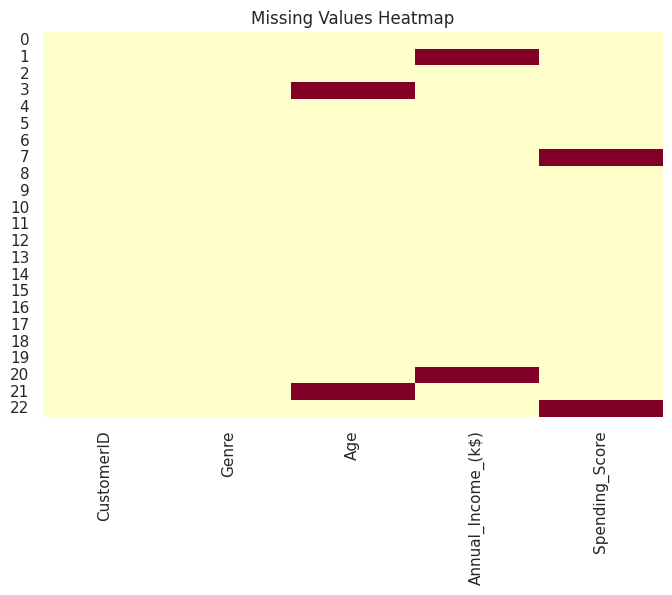


Number of duplicate rows: 3


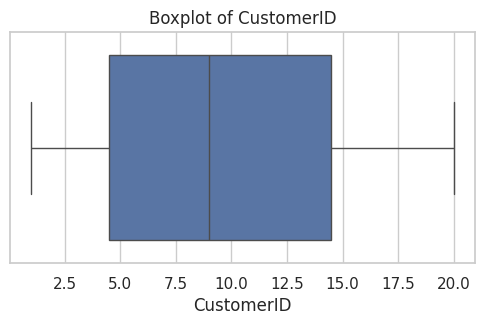

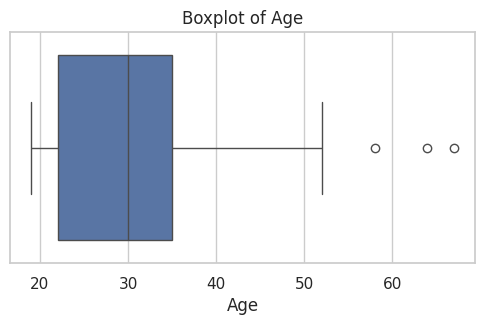

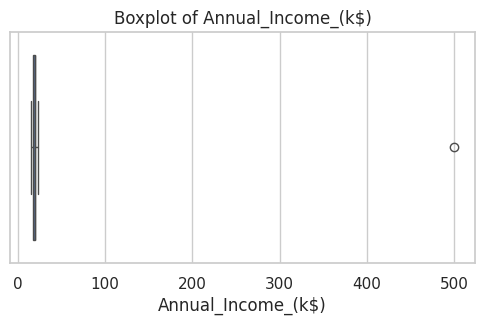

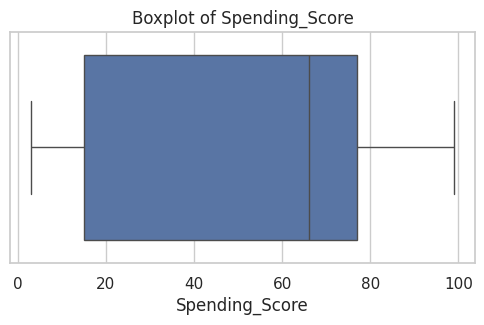


Missing values after cleaning:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64
Number of duplicates after cleaning: 0

Data Quality Report:
         CustomerID   Genre        Age  Annual_Income_(k$)  Spending_Score
count     20.00000      20  20.000000           20.000000       20.000000
unique         NaN       2        NaN                 NaN             NaN
top            NaN  Female        NaN                 NaN             NaN
freq           NaN      12        NaN                 NaN             NaN
mean      10.50000     NaN  34.210526           44.368421       48.684211
std        5.91608     NaN  14.905241          107.414696       32.611029
min        1.00000     NaN  19.000000           15.000000        3.000000
25%        5.75000     NaN  22.000000           17.750000       14.750000
50%       10.50000     NaN  32.605263           19.500000       44.342105
75%       15.25000     NaN  35.5

/tmp/ipython-input-3259599279.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
/tmp/ipython-input-3259599279.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
/tmp/ipython-input-3259599279.py:55: FutureWarning: A val

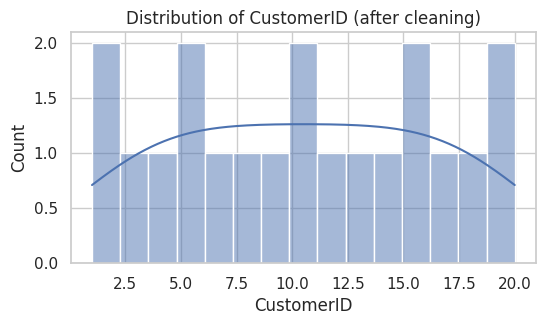

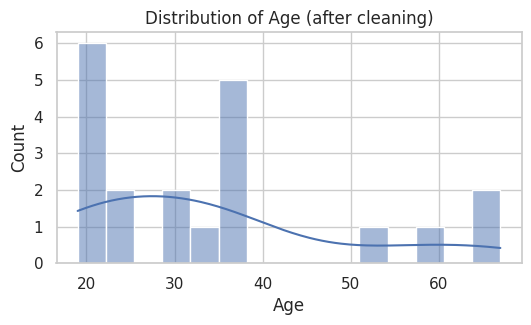

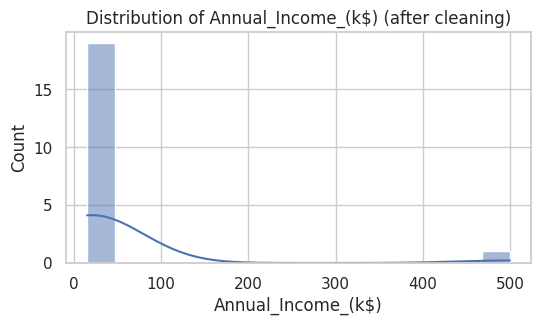

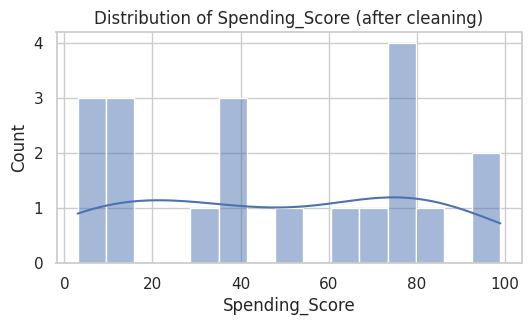

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Data cleaning complete. Cleaned dataset and report ready for download.


In [11]:
# 🔹 Project: Data Cleaning & Quality Report (Dirtydataset.CSV)
# Tools: Pandas, Matplotlib, Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Step 1: Upload your CSV
from google.colab import files
uploaded = files.upload()  # Select your Dirtydataset.CSV

# Step 2: Load dataset
dataset_path = 'Dirtydataset.CSV'  # Ensure filename matches
df = pd.read_csv(dataset_path)

# Step 3: Inspect dataset
print("First 5 rows:\n", df.head())
print("\nDataset info:\n")
df.info()
print("\nSummary statistics:\n", df.describe())

# Step 4: Detect missing values
missing = df.isnull().sum()
print("\nMissing values per column:\n", missing)

plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

# Step 5: Detect duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Step 6: Detect outliers (numeric columns)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Step 7: Clean the data
# Drop duplicates
df_cleaned = df.drop_duplicates()

# Fill missing values: numeric -> mean, categorical -> mode
for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ['int64','float64']:
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Step 8: Verify cleaning
print("\nMissing values after cleaning:\n", df_cleaned.isnull().sum())
print("Number of duplicates after cleaning:", df_cleaned.duplicated().sum())

# Step 9: Data Quality Report (summary statistics)
summary = df_cleaned.describe(include='all')
print("\nData Quality Report:\n", summary)

# Step 10: Save cleaned dataset and report
df_cleaned.to_csv('Dirtydataset_cleaned.csv', index=False)
summary.to_csv('Dirtydataset_data_quality_report.csv')

# Step 11: Plot distributions after cleaning
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_cleaned[col], kde=True, bins=15)
    plt.title(f"Distribution of {col} (after cleaning)")
    plt.show()

# Step 12: Download cleaned CSV and report
from google.colab import files
files.download('Dirtydataset_cleaned.csv')
files.download('Dirtydataset_data_quality_report.csv')

print("✅ Data cleaning complete. Cleaned dataset and report ready for download.")
